In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
Fraud_check = pd.read_csv("D:/DS Assignments/RF/Fraud_check.csv")

In [3]:
Fraud_check.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [4]:
label_encoder = preprocessing.LabelEncoder()
Fraud_check['Undergrad']= label_encoder.fit_transform(Fraud_check['Undergrad'])

In [5]:
Fraud_check['Marital.Status']= label_encoder.fit_transform(Fraud_check['Marital.Status'])

In [6]:
Fraud_check['Urban']= label_encoder.fit_transform(Fraud_check['Urban'])

In [7]:
Fraud_check.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,50047,10,1,68833
1,1,0,134075,18,1,33700
2,0,1,160205,30,1,36925
3,1,2,193264,15,1,50190
4,0,1,27533,28,0,81002


<AxesSubplot:xlabel='Taxable_Income', ylabel='Density'>

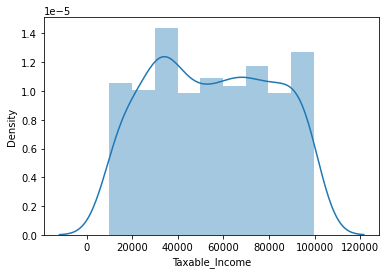

In [8]:
sns.distplot(Fraud_check['Taxable_Income'])

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

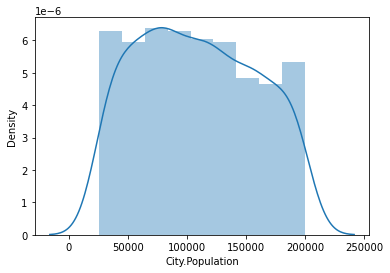

In [9]:
sns.distplot(Fraud_check['City.Population'])

<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

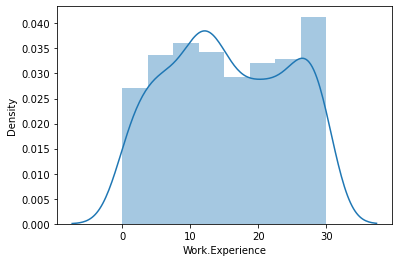

In [10]:
sns.distplot(Fraud_check['Work.Experience'])

<AxesSubplot:xlabel='Undergrad', ylabel='count'>

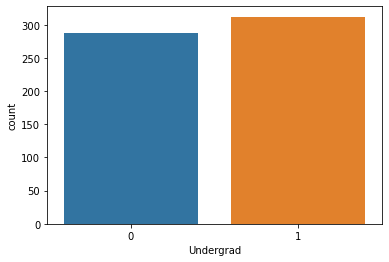

In [11]:
sns.countplot(x ='Undergrad', data = Fraud_check)

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

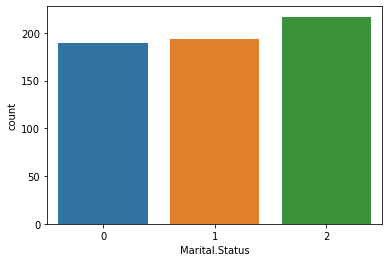

In [12]:
sns.countplot(x ='Marital.Status', data = Fraud_check)

<AxesSubplot:xlabel='Urban', ylabel='count'>

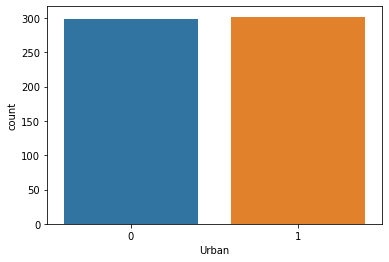

In [13]:
sns.countplot(x ='Urban', data = Fraud_check)

In [14]:
x=Fraud_check.iloc[ :, 0:5]
y=Fraud_check['Taxable_Income']<=30000

In [15]:
RF = RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=14,criterion="entropy")

In [16]:
Fraud_check.shape

(600, 6)

In [17]:
RF.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=14, n_jobs=5,
                       oob_score=True)

In [18]:
RF.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1969492032),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=290558413),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=887521680),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=663209429),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1464897852),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1575917913),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=525622125),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2096990174),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
          

In [19]:
RF.classes_

array([False,  True])

In [20]:
RF.n_classes_

2

In [21]:
RF.n_features_

5

In [22]:
RF.n_outputs_

1

In [23]:
RF.oob_score_

0.7216666666666667

In [24]:
RF_pred = RF.predict(x)

In [25]:
RF_pred

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
        True, False,

In [26]:
cols = ["RF_pred",'Taxable_Income']

In [27]:
Fraud_check["Taxable_Income"]

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable_Income, Length: 600, dtype: int64

In [28]:
from sklearn import metrics
print(metrics.confusion_matrix(y, RF_pred))

[[476   0]
 [ 17 107]]


In [29]:
pd.crosstab(y,RF_pred)

col_0,False,True
Taxable_Income,,
False,476,0
True,17,107


In [30]:
print(metrics.classification_report(y, RF_pred))

              precision    recall  f1-score   support

       False       0.97      1.00      0.98       476
        True       1.00      0.86      0.93       124

    accuracy                           0.97       600
   macro avg       0.98      0.93      0.95       600
weighted avg       0.97      0.97      0.97       600



In [31]:
accuracies = cross_val_score(estimator = RF, X = x,\
     y = y, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.75 Accuracy Variance      0.024720661623652235


In [32]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y,RF_pred)

0.9716666666666667

# Company Data

In [33]:
Company_data = pd.read_csv("D:/DS Assignments/RF/Company_Data.csv")

In [34]:
Company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [35]:
label_encoder = preprocessing.LabelEncoder()
Company_data['ShelveLoc']= label_encoder.fit_transform(Company_data['ShelveLoc'])

In [36]:
label_encoder = preprocessing.LabelEncoder()
Company_data['Urban']= label_encoder.fit_transform(Company_data['Urban'])

In [37]:
label_encoder = preprocessing.LabelEncoder()
Company_data['US']= label_encoder.fit_transform(Company_data['US'])

In [38]:
Company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


<AxesSubplot:xlabel='Sales', ylabel='Density'>

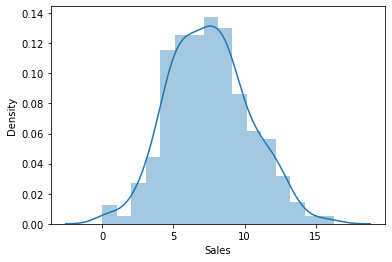

In [39]:
sns.distplot(Company_data['Sales'])

<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

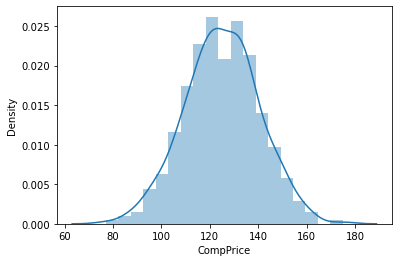

In [40]:
sns.distplot(Company_data['CompPrice'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

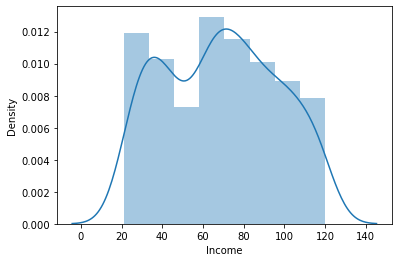

In [41]:
sns.distplot(Company_data['Income'])

<AxesSubplot:xlabel='Advertising', ylabel='Density'>

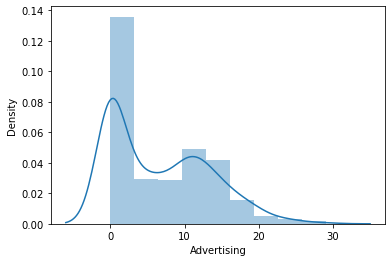

In [42]:
sns.distplot(Company_data['Advertising'])

<AxesSubplot:xlabel='Population', ylabel='Density'>

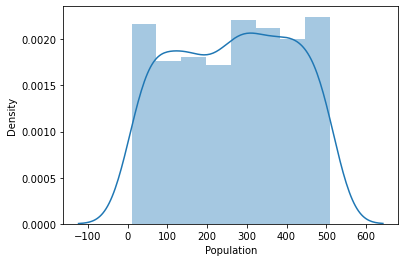

In [43]:
sns.distplot(Company_data['Population'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

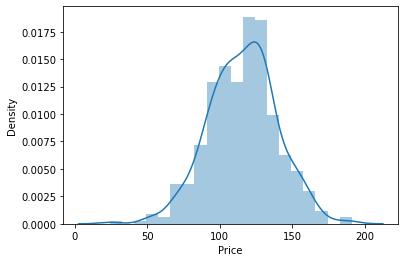

In [44]:
sns.distplot(Company_data['Price'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

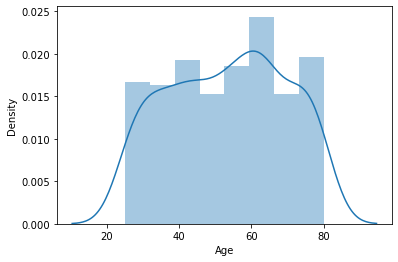

In [45]:
sns.distplot(Company_data['Age'])

<AxesSubplot:xlabel='US', ylabel='count'>

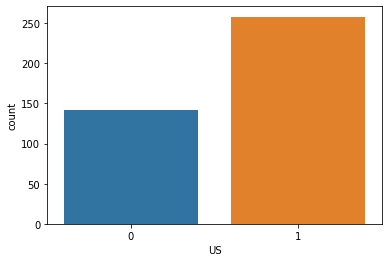

In [46]:
sns.countplot(x ='US', data = Company_data)

<AxesSubplot:xlabel='Urban', ylabel='count'>

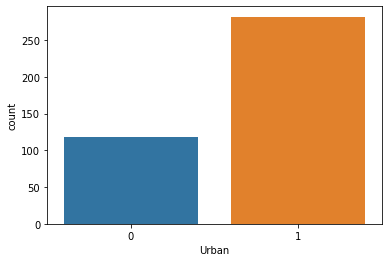

In [47]:
sns.countplot(x ='Urban', data = Company_data)

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

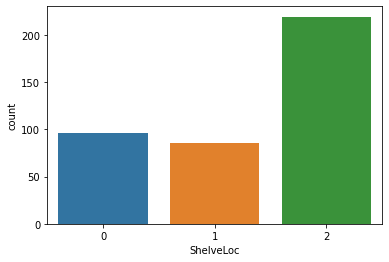

In [48]:
sns.countplot(x ='ShelveLoc', data = Company_data)

In [49]:
x1=Company_data.iloc[ :, 1:]
y1=Company_data['Sales']>=7.0 #### Taken sales>7.0 as high sales

In [50]:
x1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [51]:
y1.head()

0     True
1     True
2     True
3     True
4    False
Name: Sales, dtype: bool

In [52]:
Company_data.shape

(400, 11)

In [53]:
RF1 = RandomForestClassifier(n_jobs=5,oob_score=True,n_estimators=14,criterion="entropy")

In [54]:
RF1.fit(x1,y1)

RandomForestClassifier(criterion='entropy', n_estimators=14, n_jobs=5,
                       oob_score=True)

In [55]:
RF1.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1957585192),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=638761742),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=904970720),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1319526516),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1078914947),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1033425252),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=845209929),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=621828272),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
          

In [56]:
RF1.classes_

array([False,  True])

In [57]:
RF1.n_classes_

2

In [58]:
RF1.n_features_

10

In [59]:
RF1.n_outputs_

1

In [60]:
RF1.oob_score_

0.7525

In [61]:
RF1.predict(x1)

array([ True,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
       False, False, False,  True,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True, False,

In [62]:
RF_pred1 = RF1.predict(x1)

In [63]:
pd.Series(RF_pred1).value_counts()

True     215
False    185
dtype: int64

In [64]:
print(metrics.confusion_matrix(y1, RF_pred1))

[[183   1]
 [  2 214]]


In [65]:
pd.crosstab(y1,RF_pred1)

col_0,False,True
Sales,,
False,183,1
True,2,214


In [66]:
print(metrics.classification_report(y1, RF_pred1))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       184
        True       1.00      0.99      0.99       216

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [67]:
accuracies = cross_val_score(estimator = RF1, X = x1,\
     y = y1, cv = 10)
print("Accuracy Mean {} Accuracy Variance \
     {}".format(accuracies.mean(),accuracies.std()))

Accuracy Mean 0.7825000000000001 Accuracy Variance      0.06523994175349945


In [68]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y1,RF_pred1)

0.9925